## Aspiring Mind Employment Outcome 2015 (AMEO)

### Import dependencies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats
import datetime as dt
%matplotlib inline

In [20]:
df=pd.read_excel(r'C:\Users\Suvakanta\Desktop\DS_Internship_2023\Data Analysis\AMEO Data Analysis\dataset.xlsx',
                usecols = range(1,39))
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [21]:
df.shape

(3998, 38)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [23]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [24]:
df.drop(['ID','CollegeID','CollegeCityID'],axis=1,inplace=True)

In [7]:
#df[['12graduation','GraduationYear']] = df[['12graduation','GraduationYear']].apply(pd.to_datetime)

In [25]:
date_cols = df.select_dtypes(include=['datetime64[ns]'])
print(date_cols.columns)
print()
print()
print(len(date_cols.columns))

Index(['DOJ', 'DOB'], dtype='object')


2


In [26]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
print(num_cols.columns)
print()
print()
print(len(num_cols.columns))

Index(['Salary', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


24


In [27]:
cat_cols = df.select_dtypes(include=['object'])
print(cat_cols.columns)
print()
print()
print(len(cat_cols.columns))

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')


9


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00
GraduationYear,3998.0,2012.105803,31.857271,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03
English,3998.0,501.649075,104.940021,180.0000,425.000000,500.000000,570.000000,8.750000e+02
Logical,3998.0,501.598799,86.783297,195.0000,445.000000,505.000000,565.000000,7.950000e+02


In [29]:
df.isnull().sum().sum()

0

### Univariate Analysis

In [13]:
print(df['Salary'].mean())
print()
print(df['Salary'].median())

307699.8499249625

300000.0


In [14]:
df['Designation'].nunique()

419

In [15]:
df['JobCity'].nunique()

339

<Axes: xlabel='count', ylabel='12graduation'>

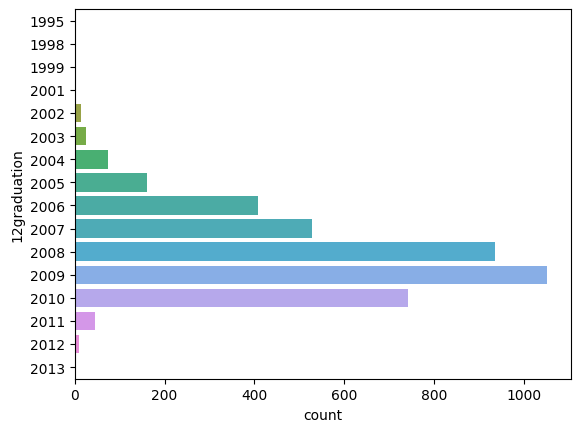

In [30]:
sns.countplot(y =df['12graduation'])

**Observation -->** from the above plot we can see that 2009 year has the more 12th graduated candidates.

<Axes: xlabel='CollegeTier', ylabel='count'>

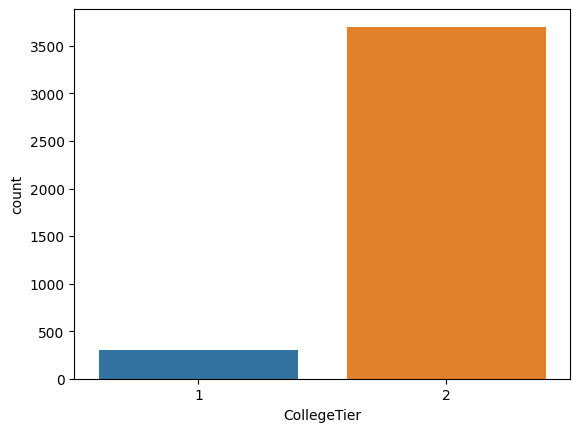

In [31]:
sns.countplot(x =df['CollegeTier'])

**Observation -->** from the above plot we can observe that the dataset contains much more students from Teir 2 college.

Salary                      Axes(0.125,0.747241;0.133621x0.132759)
10percentage             Axes(0.285345,0.747241;0.133621x0.132759)
12percentage              Axes(0.44569,0.747241;0.133621x0.132759)
CollegeTier              Axes(0.606034,0.747241;0.133621x0.132759)
collegeGPA               Axes(0.766379,0.747241;0.133621x0.132759)
CollegeCityTier             Axes(0.125,0.587931;0.133621x0.132759)
English                  Axes(0.285345,0.587931;0.133621x0.132759)
Logical                   Axes(0.44569,0.587931;0.133621x0.132759)
Quant                    Axes(0.606034,0.587931;0.133621x0.132759)
Domain                   Axes(0.766379,0.587931;0.133621x0.132759)
ComputerProgramming         Axes(0.125,0.428621;0.133621x0.132759)
ElectronicsAndSemicon    Axes(0.285345,0.428621;0.133621x0.132759)
ComputerScience           Axes(0.44569,0.428621;0.133621x0.132759)
MechanicalEngg           Axes(0.606034,0.428621;0.133621x0.132759)
ElectricalEngg           Axes(0.766379,0.428621;0.133621x0.132

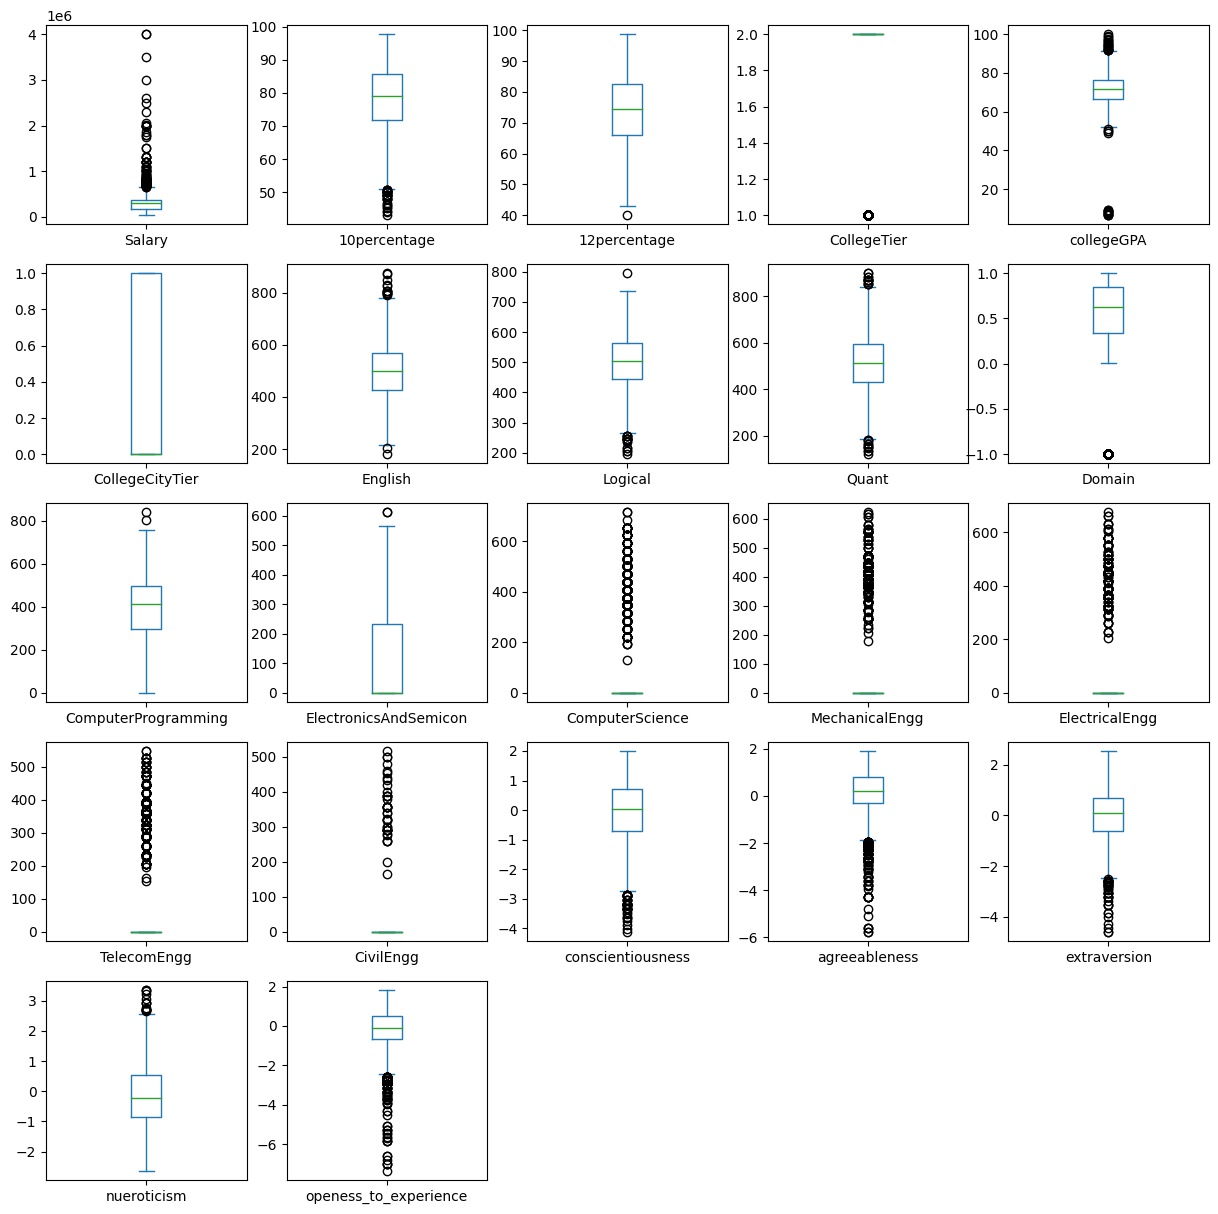

In [13]:
# Outliers detection
num_cols.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 15))

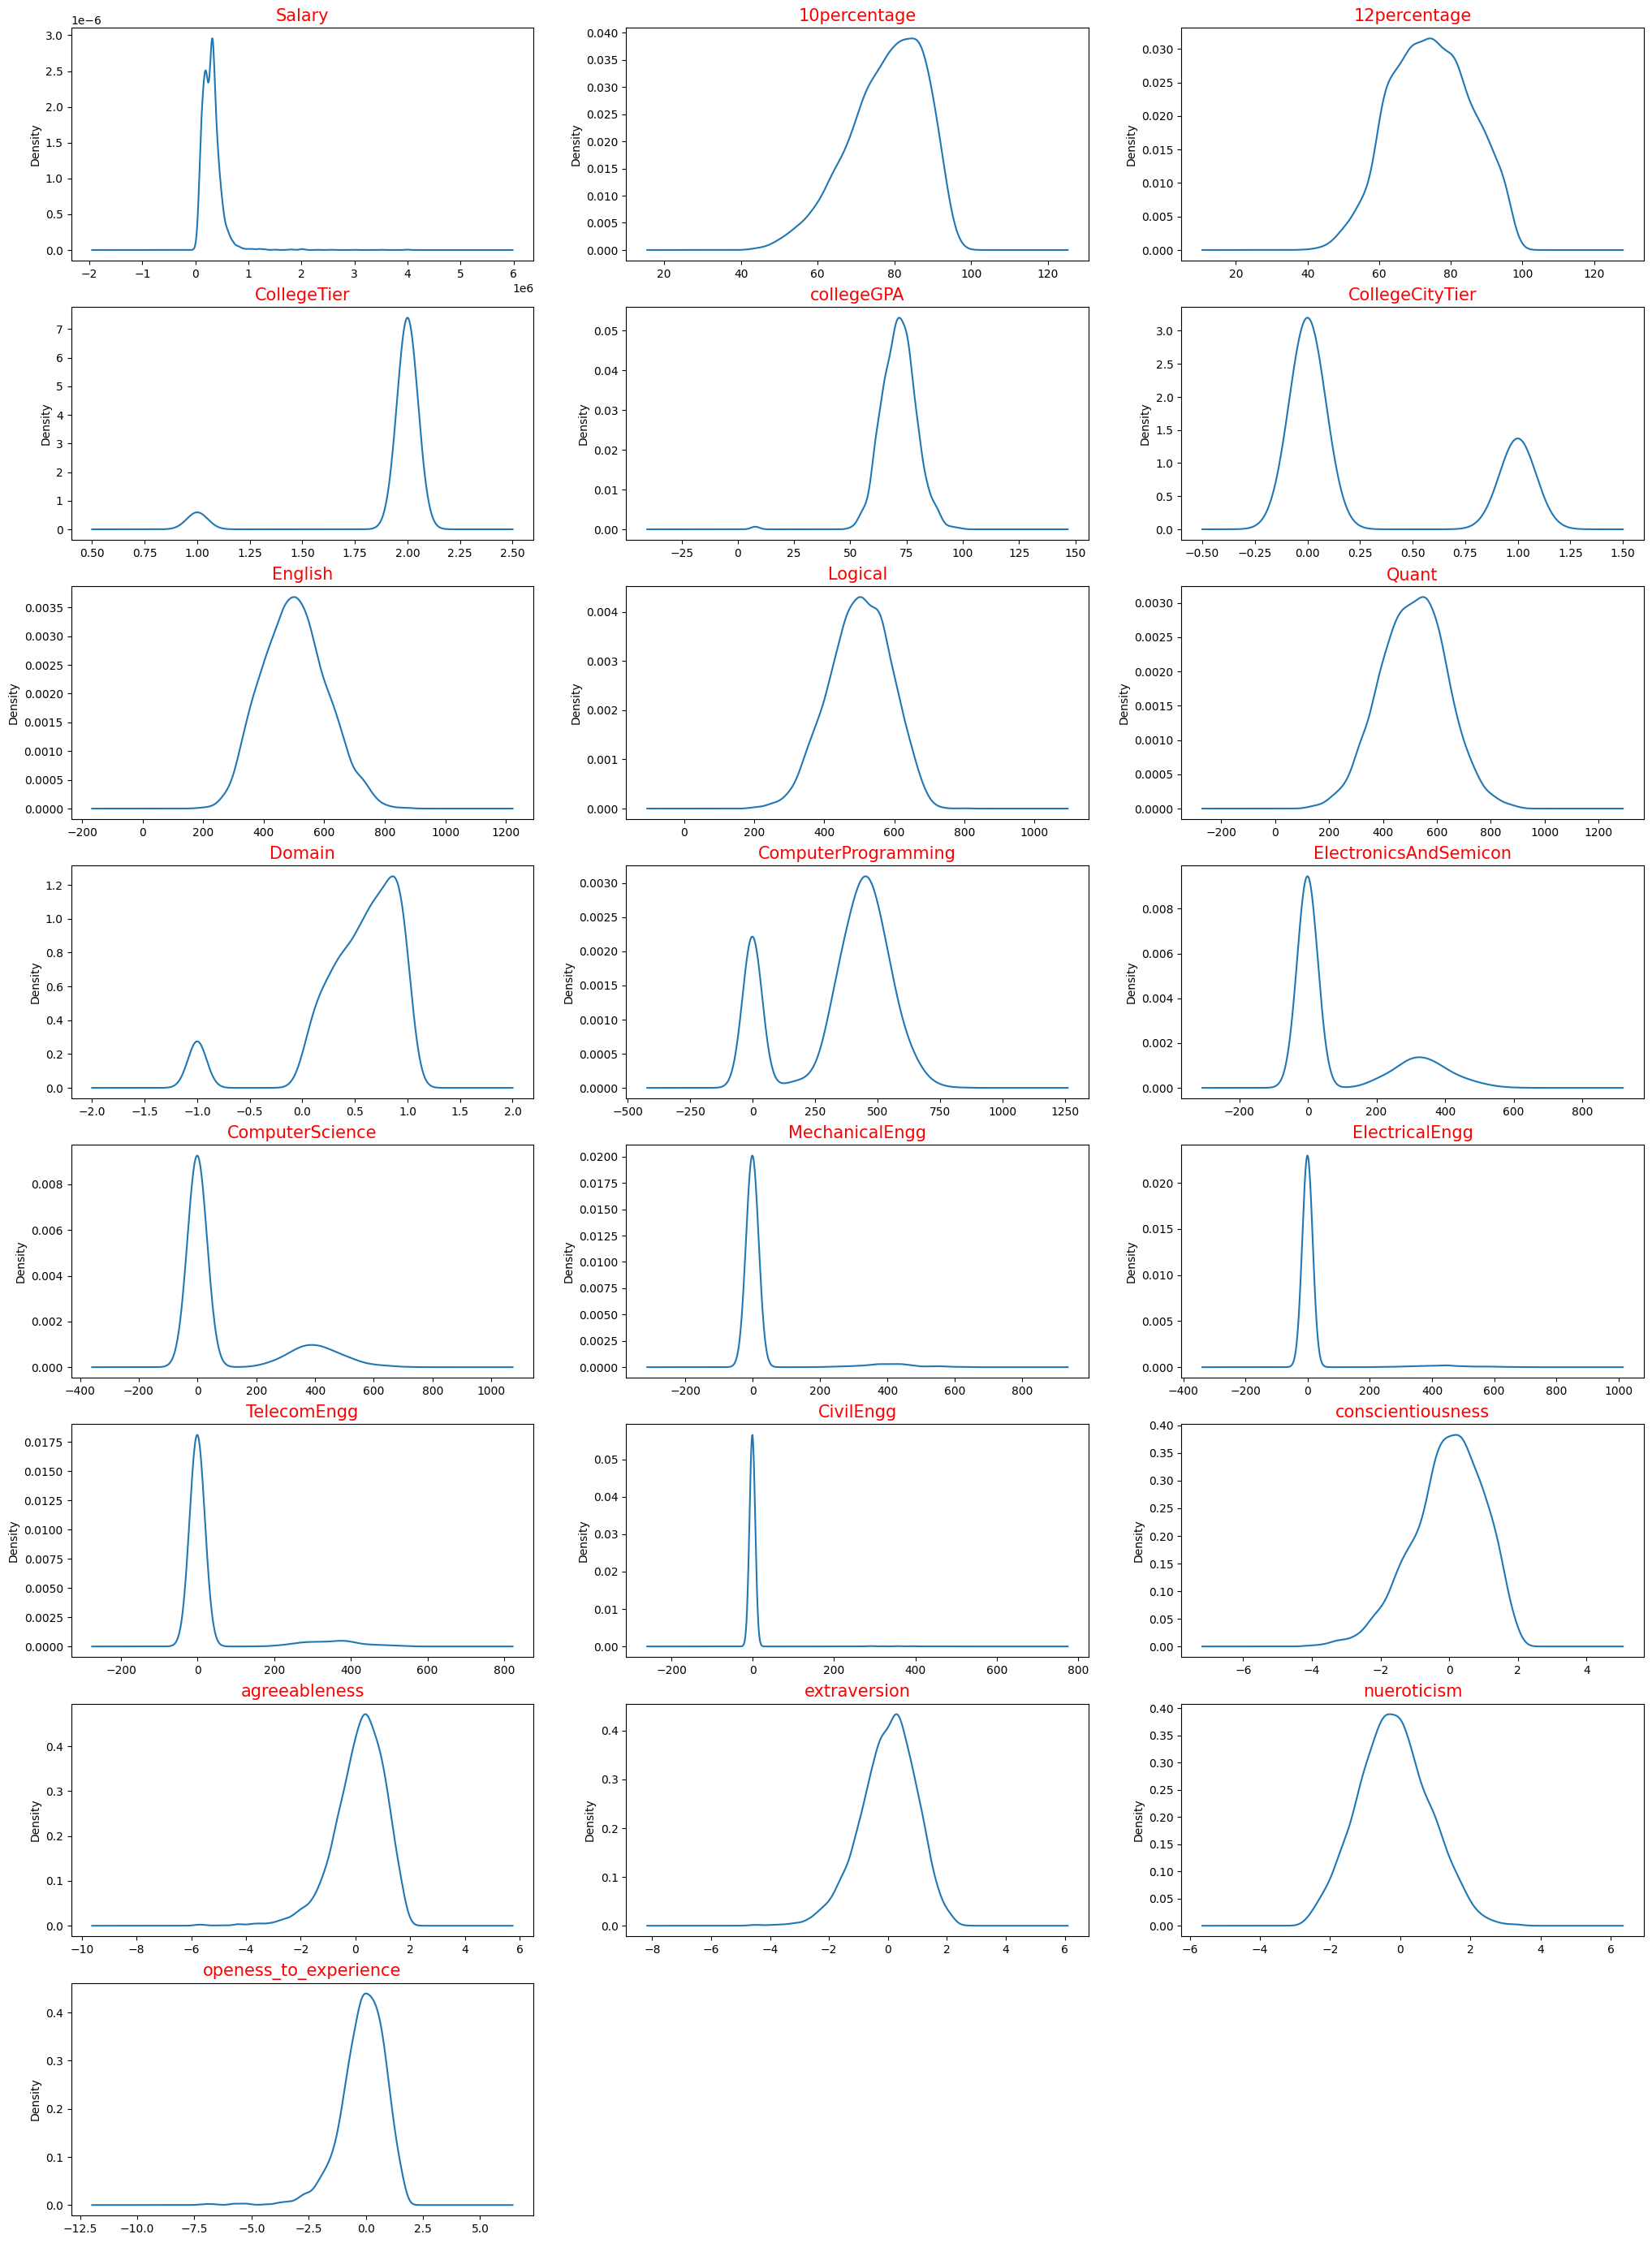

In [14]:
# Distribution of each numerical column
for i,col in zip(range(len(num_cols.columns)),num_cols.columns):
    plt.subplot(8,3,i+1) 
    df[col].plot(kind='kde',figsize=(25, 35))
    plt.title(col, fontsize = 15,color='r')

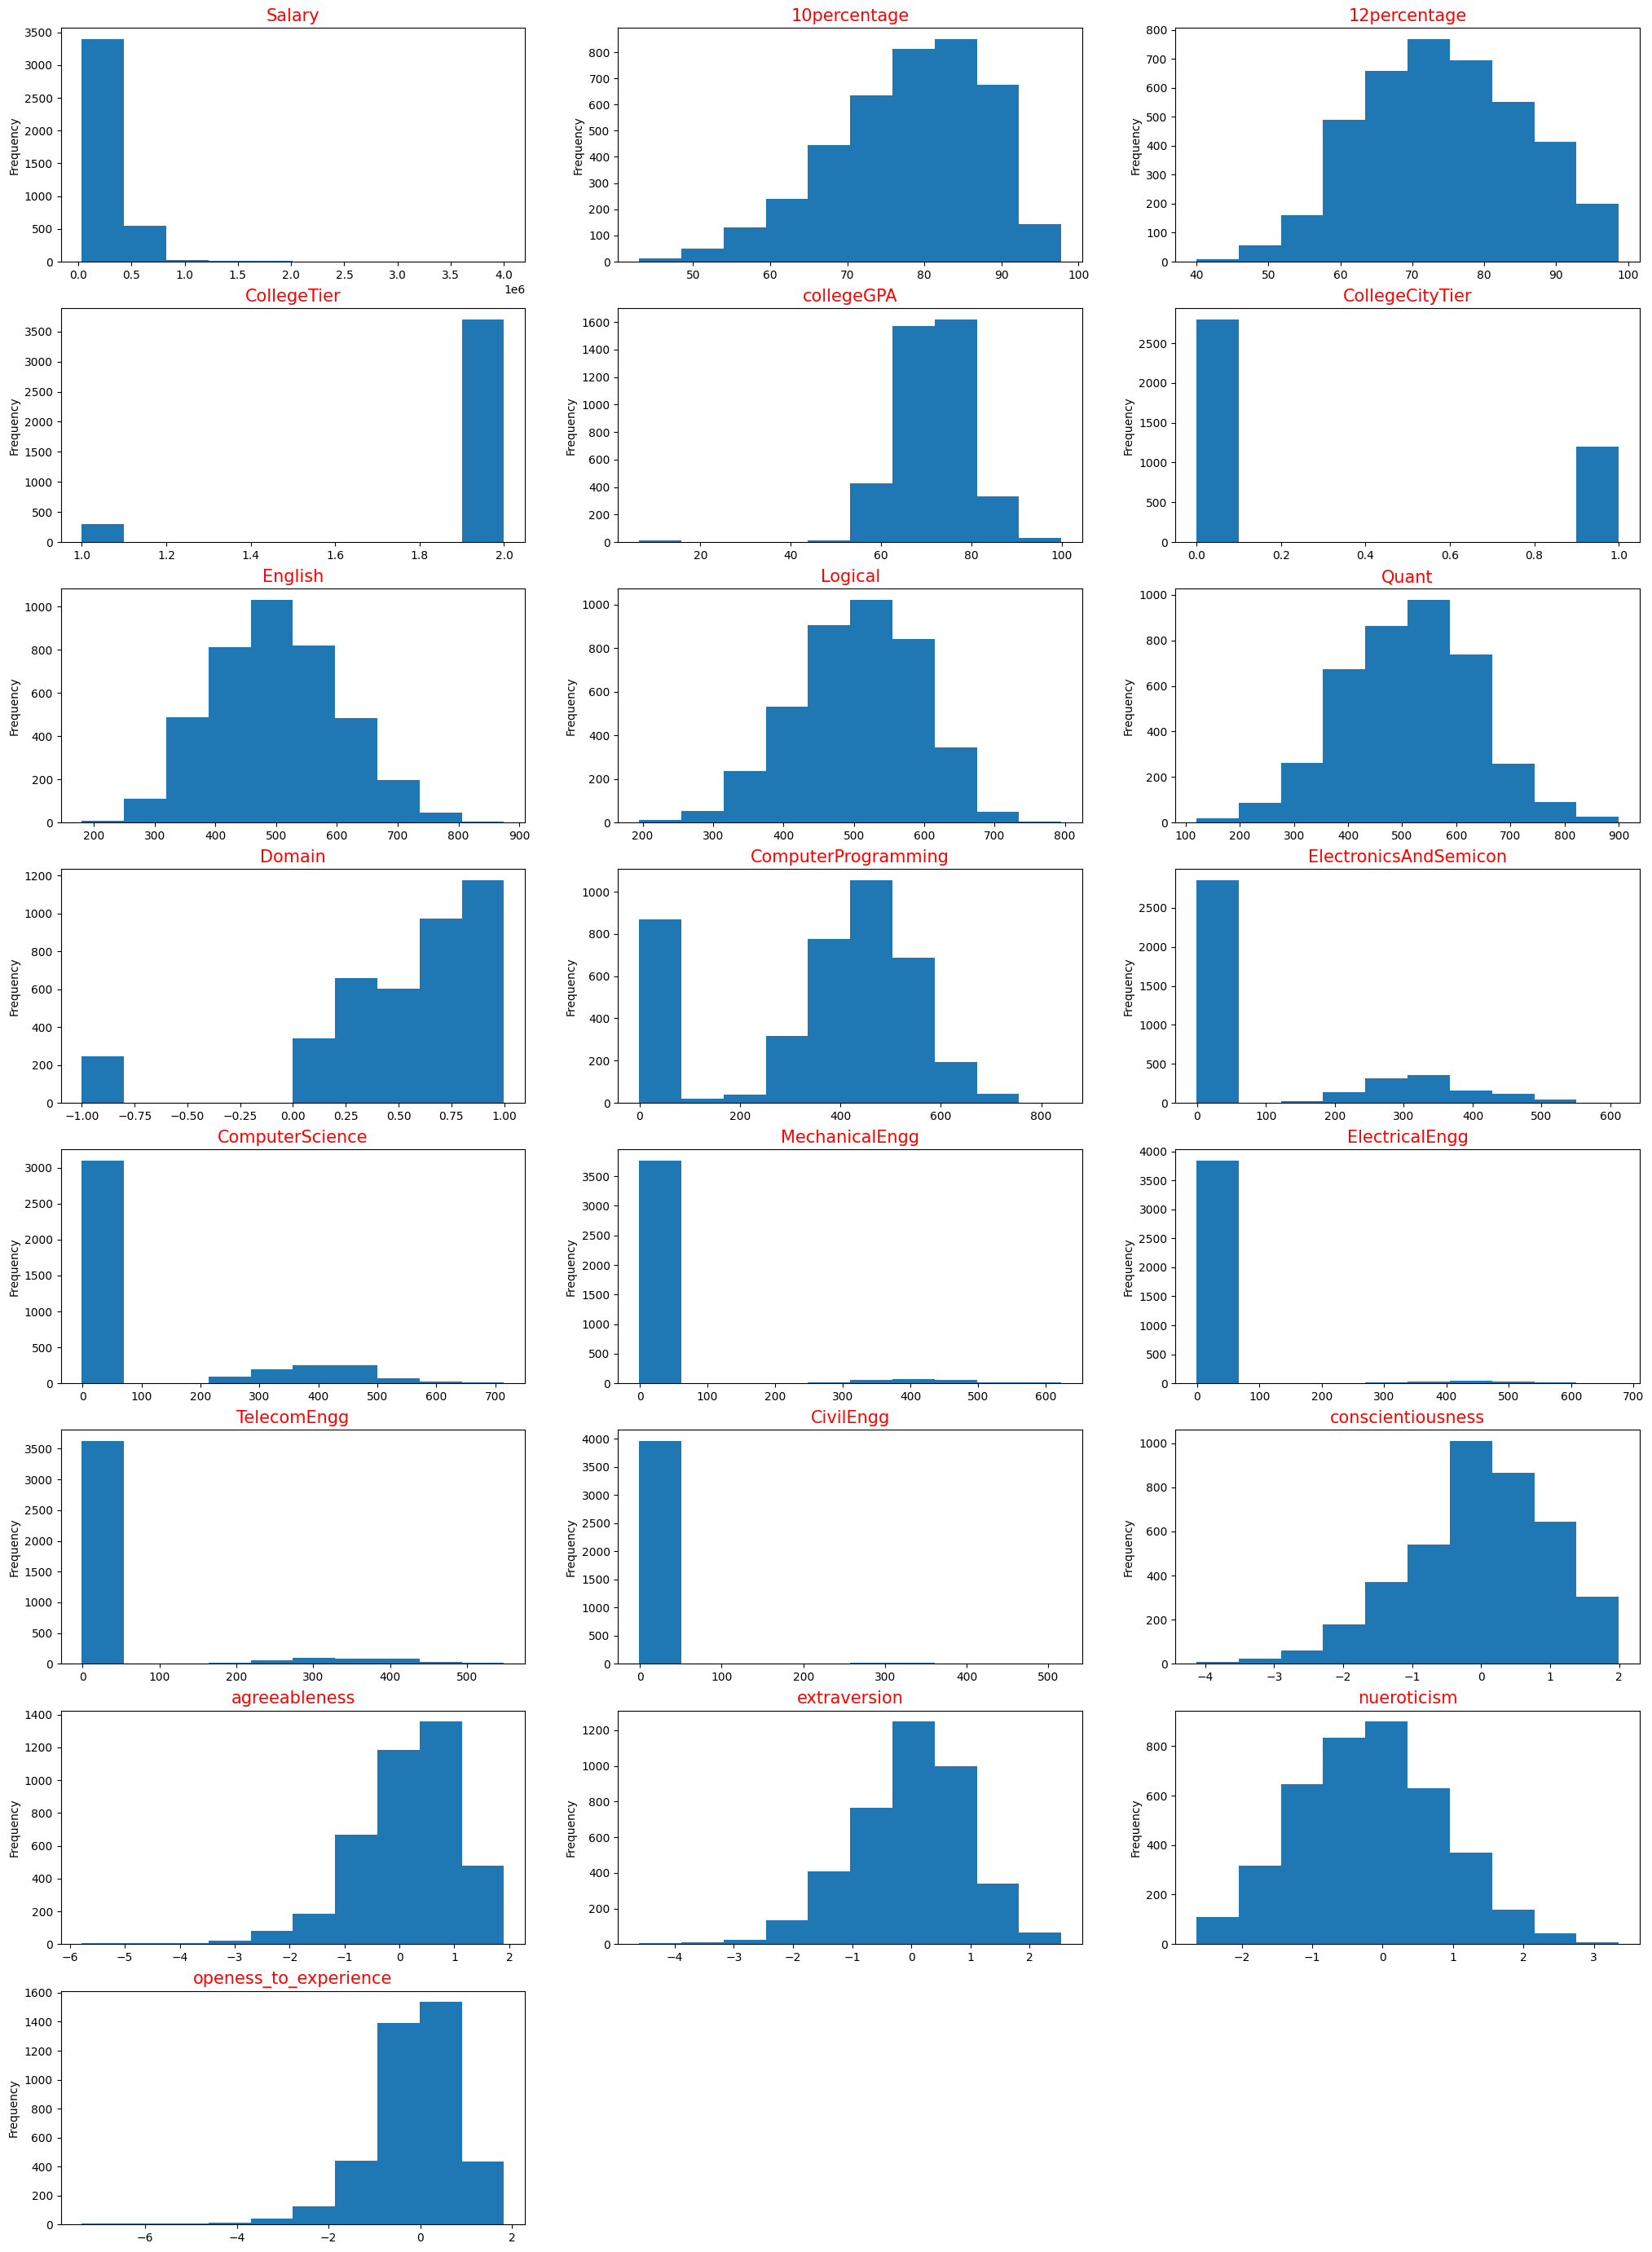

In [15]:
# Frequecy distribution by histogram
for i,col in zip(range(len(num_cols.columns)),num_cols.columns):
    plt.subplot(8,3,i+1) 
    df[col].plot(kind='hist',figsize=(25, 35))
    plt.title(col, fontsize = 15,color='r')

<Axes: >

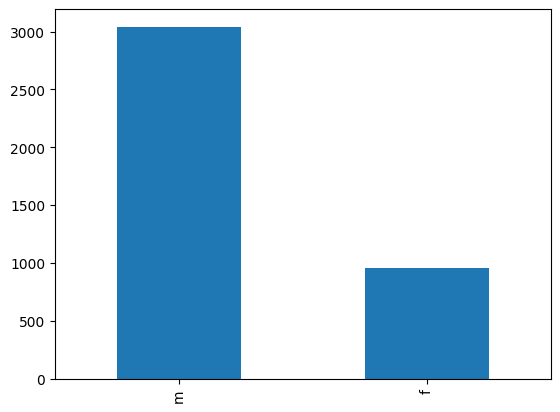

In [17]:
cat_cols['Gender'].value_counts().plot(kind='bar')

**Observation -->** As we can see from the plot males count is more than females

<Axes: >

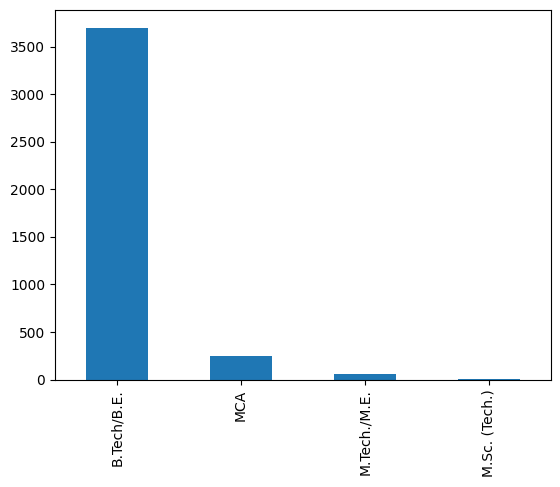

In [18]:
cat_cols['Degree'].value_counts().plot(kind='bar')

**Observation -->** From above plot we can see that B.Tech/B.E students are very high count most of the students are B.Tech/B.E graduates.

<Axes: >

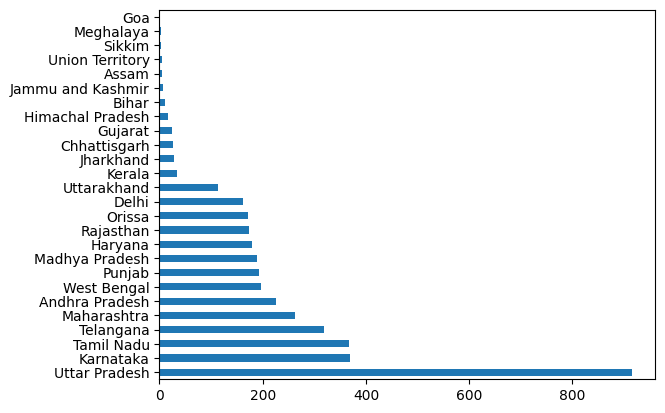

In [19]:
cat_cols['CollegeState'].value_counts().plot(kind='barh')

**Observation -->** From the above plot most of the students are from Uttar Pardesh and very less are from Meghalaya

<Axes: >

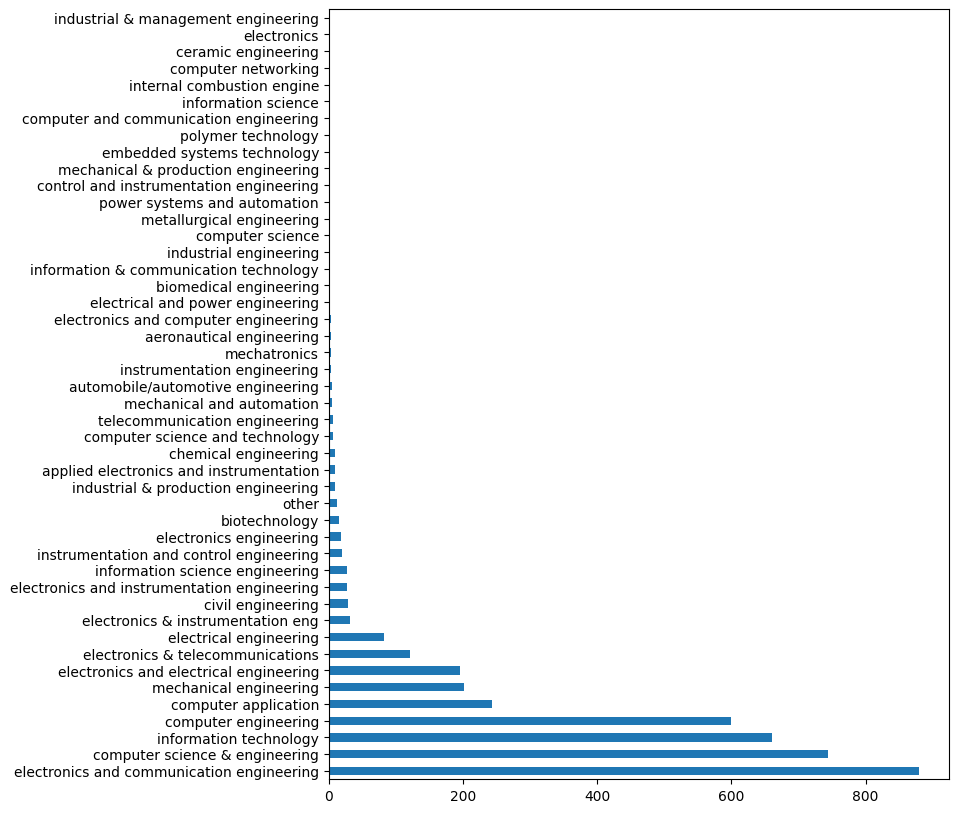

In [20]:
cat_cols['Specialization'].value_counts().plot(kind='barh',figsize=(8,10))

**Observation -->** From the plot above we observe that Electronics and communication is having more count and computer science & engineering. It means that mostlly students has the specialoization in electronics and computer science.

<Axes: xlabel='GraduationYear', ylabel='count'>

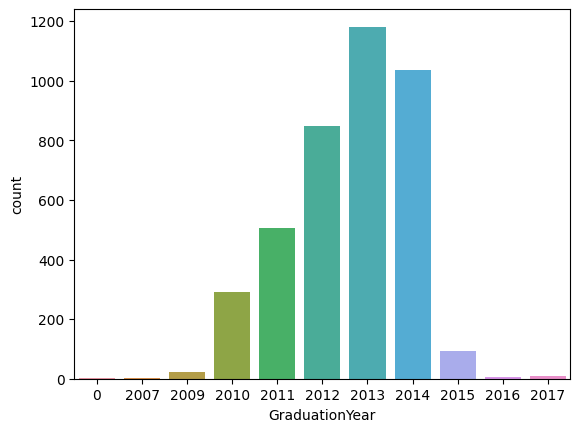

In [32]:
sns.countplot(x=df['GraduationYear'])

**Observation -->** Above graph shows that we have more 2013 graduates and very less 2007,2016,2017 graduates in the dataset.

### Bivariate Analysis

In [22]:
# Correlation among features
num_cols.corr()

,Salary,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Salary,1.000000,0.177373,0.170254,-0.179332,0.130103,0.015384,0.178219,0.179275,0.230627,0.104656,...,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.177373,1.000000,0.643378,-0.126042,0.312538,0.116707,0.350780,0.316014,0.317640,0.078563,...,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12percentage,0.170254,0.643378,1.000000,-0.100771,0.346137,0.130462,0.212888,0.243571,0.312413,0.074099,...,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeTier,-0.179332,-0.126042,-0.100771,1.000000,-0.086781,-0.101494,-0.183843,-0.182811,-0.251103,-0.061436,...,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.130103,0.312538,0.346137,-0.086781,1.000000,0.017471,0.106478,0.196610,0.217380,0.107252,...,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityTier,0.015384,0.116707,0.130462,-0.101494,0.017471,1.000000,0.050462,0.020353,0.007896,0.009250,...,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790
English,0.178219,0.350780,0.212888,-0.183843,0.106478,0.050462,1.000000,0.444357,0.375784,0.089721,...,0.059500,-0.002477,0.032438,-0.005822,-0.007724,0.034943,0.194990,0.018755,-0.155528,0.067979
Logical,0.179275,0.316014,0.243571,-0.182811,0.196610,0.020353,0.444357,1.000000,0.500152,0.169453,...,0.044481,-0.009861,0.012003,-0.012947,-0.011286,0.025876,0.167207,-0.006949,-0.178781,0.048420
Quant,0.230627,0.317640,0.312413,-0.251103,0.217380,0.007896,0.375784,0.500152,1.000000,0.207108,...,-0.043379,0.019933,0.020975,0.021387,0.000528,-0.005639,0.103443,-0.028616,-0.131895,0.020377
Domain,0.104656,0.078563,0.074099,-0.061436,0.107252,0.009250,0.089721,0.169453,0.207108,1.000000,...,0.058762,0.048472,0.042875,0.024442,0.017569,-0.039478,0.051944,-0.024647,-0.017928,0.010412


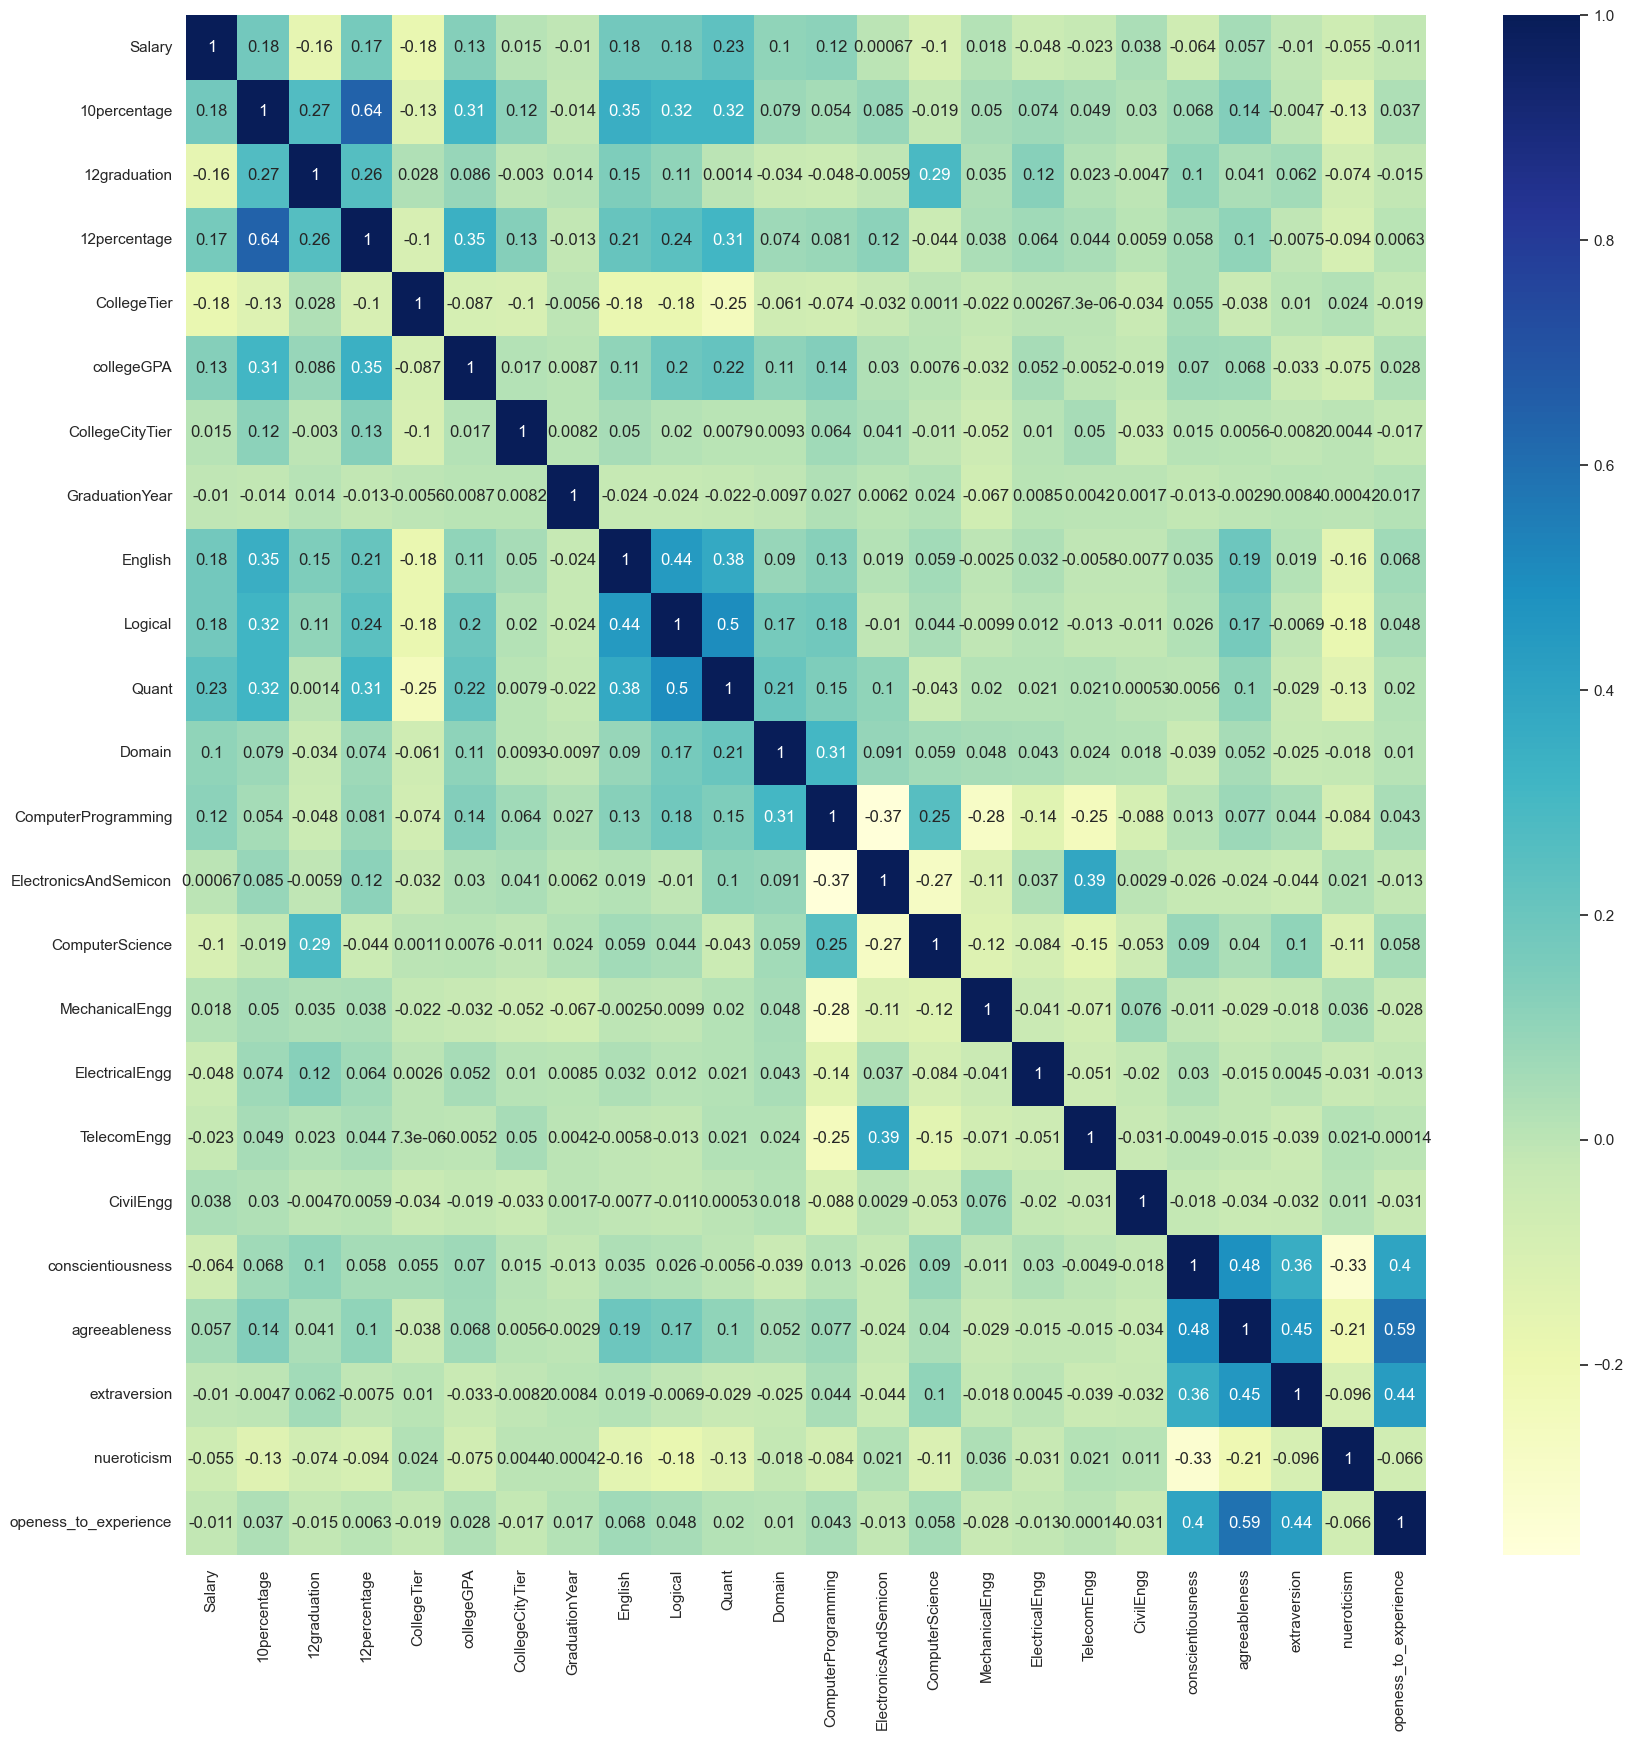

In [33]:
sns.set(style="white")
plt.figure(figsize=(20,20))
sns.heatmap(num_cols.corr(), annot=True, cmap='YlGnBu')

# Show the plot
plt.show()

**Observation -->** The heatmap above represents the correlation between different features of the data. The darker colors indicate strong positive correlation while the lighter colors indicate weak correlation. From the heatmap, it can be observed that the 10th percentage of students is strongly correlated with their 12th percentage, and the Quant scores are correlated with Logical scores. Additionally, there is a strong positive correlation between openness to experience and agreeableness. 

In [34]:
# Scatter plot between two features
def scatter(col1,col2):
    sns.scatterplot(x=df[col1],y=df[col2])
    plt.show()

widgets.interact(scatter,col1=num_cols.columns,col2=num_cols.columns)

interactive(children=(Dropdown(description='col1', options=('Salary', '10percentage', '12graduation', '12perce…

<function __main__.scatter(col1, col2)>

In [25]:
print(num_cols.columns)
print()
print()
print(cat_cols.columns)

Index(['Salary', '10percentage', '12percentage', 'CollegeTier', 'collegeGPA',
       'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')


Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')


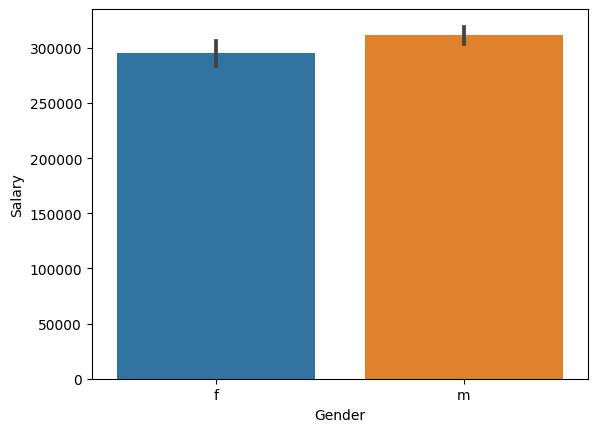

In [26]:
sns.barplot(x=df.Gender,y=df.Salary)
plt.show()

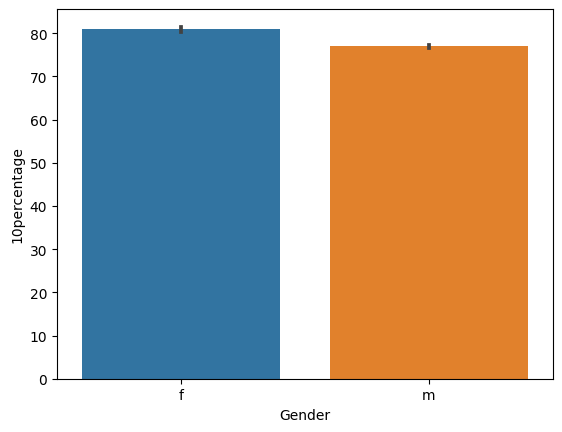

In [27]:
sns.barplot(x=df.Gender,y=df['10percentage'])
plt.show()

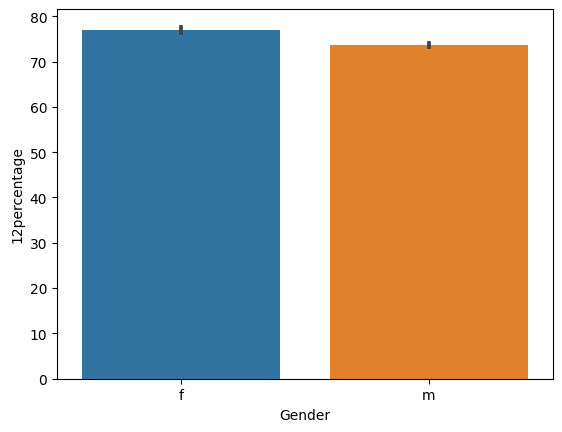

In [28]:
sns.barplot(x=df.Gender,y=df['12percentage'])
plt.show()

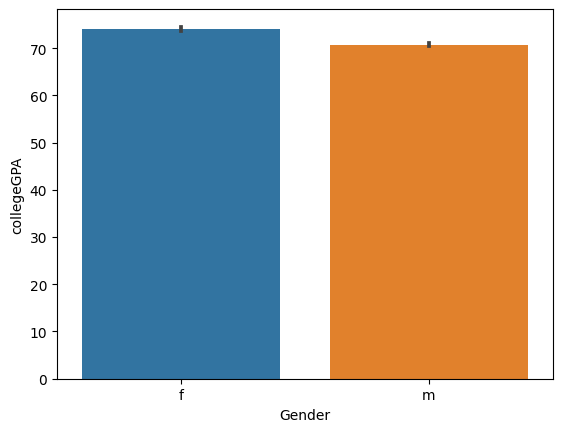

In [29]:
sns.barplot(x=df.Gender,y=df['collegeGPA'])
plt.show()

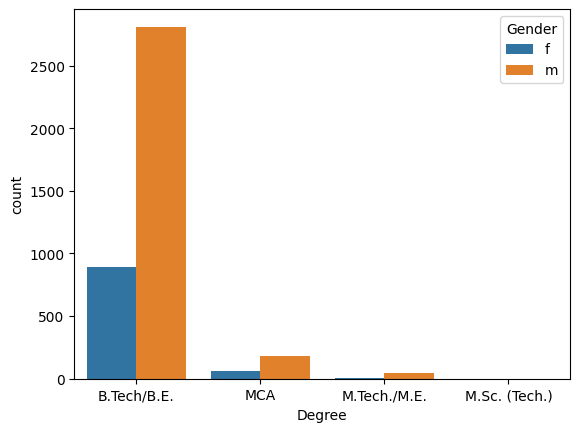

In [30]:
sns.countplot(x=df['Degree'],hue=df.Gender)
plt.show()

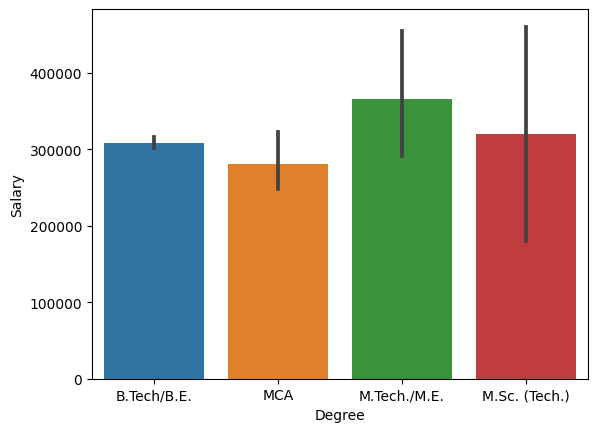

In [31]:
sns.barplot(x=df.Degree,y=df['Salary'])
plt.show()

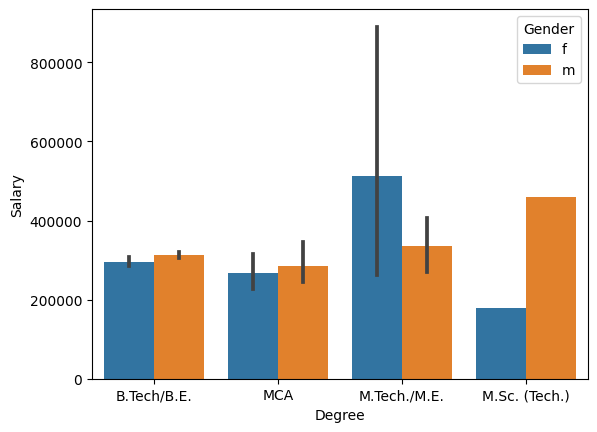

In [32]:
sns.barplot(x=df.Degree,y=df['Salary'],hue=df.Gender)
plt.show()

**Observation -->** From the above plot we can see that mostly females have done M.tech/M.E and mostly males have done M.Sc.(Tech)

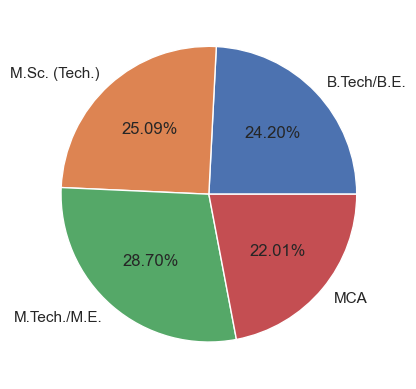

In [39]:
degree_salary=df.groupby(['Degree'])['Salary'].mean()
fig=plt.pie(degree_salary,labels=degree_salary.index,autopct = '%1.2f%%',radius = 1)

**Observation -->** The above Pie chart shows mean salary of different Degree.

In [37]:
# Figures show the score secured by male & female
lists=['English', 'Logical', 'Quant', 'Domain','ComputerProgramming', 'ElectronicsAndSemicon', 
       'ComputerScience','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience']

def score(Section):
    return sns.barplot(x=df.Gender,y=df[Section])
    
widgets.interact(score,Section=lists)

interactive(children=(Dropdown(description='Section', options=('English', 'Logical', 'Quant', 'Domain', 'Compu…

<function __main__.score(Section)>

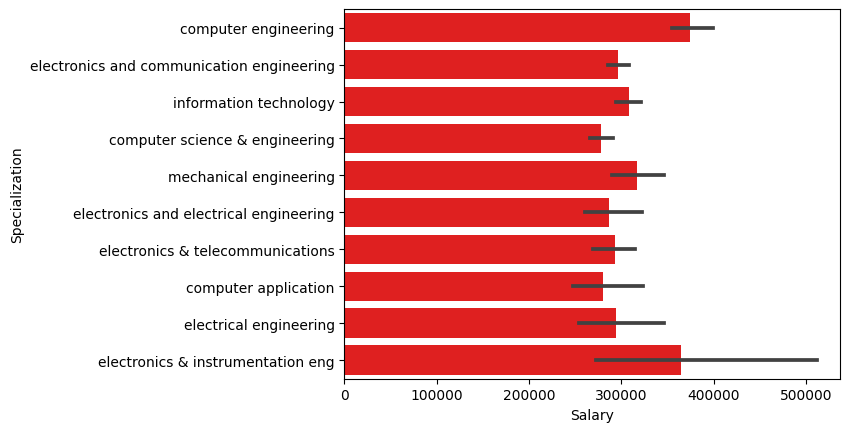

In [34]:
top10=df['Specialization'].value_counts()
top10_spec=list(top10.head(10).index)
top10_spec=df['Specialization'].isin(['electronics and communication engineering',
                                     'computer science & engineering',
                                     'information technology',
                                     'computer engineering',
                                     'computer application',
                                     'mechanical engineering',
                                     'electronics and electrical engineering',
                                     'electronics & telecommunications',
                                     'electrical engineering',
                                     'electronics & instrumentation eng'])

sns.barplot(x=df.Salary,y=df[top10_spec].Specialization,color='r')
plt.show()

### Research Questions

**Q.1.** 	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [40]:
df['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [43]:
filter_data = df.loc[df['Designation'].isin(['programmer analyst', 
                                    'software engineer', 'hardware engineer', 'associate engineer'])]

filter_data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
19,325000,2014-09-01,present,software engineer,Pune,f,1990-11-30,79.00,cbse,2008,...,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295
20,320000,2010-11-01,2012-09-01 00:00:00,software engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,2006,...,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444
21,200000,2012-08-01,2013-12-01 00:00:00,software engineer,-1,f,1991-08-20,75.67,up,2007,...,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539
24,335000,2014-06-01,2015-06-01 00:00:00,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,2010,...,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692
31,340000,2014-08-01,2015-04-01 00:00:00,software engineer,Bangalore,m,1992-10-23,77.20,state board,2010,...,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889


In [44]:
filter_data['Designation'].value_counts()

software engineer     539
programmer analyst    139
hardware engineer       8
associate engineer      6
Name: Designation, dtype: int64

In [47]:
avg_sal = filter_data['Salary'].median()
avg_sal

325000.0

In [48]:
if avg_sal >= 250000 and avg_sal <= 300000:
    print("The claim is true.")
else:
    print("The claim is false.")

The claim is false.


**Q.2.** 	Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?

- Test : Is there a relationship between **Gender** and **Specialisation** ?
- H0 : There is no relationship
- H1 : There is a relationship

In [52]:
ct = pd.crosstab(df['Gender'],df['Specialization'])
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
 
print('Chi-Square Test Statistic:', stat)
print()
print('P-value:', p)
print()
print('Degrees of Freedom:', dof)
print()

if p <= alpha:
    print('There is a relationship (Reject H0)')
else:
    print('There is no relationship (Failed to reject H0)')

Chi-Square Test Statistic: 104.46891913608455

P-value: 1.2453868176976918e-06

Degrees of Freedom: 45

There is a relationship (Reject H0)


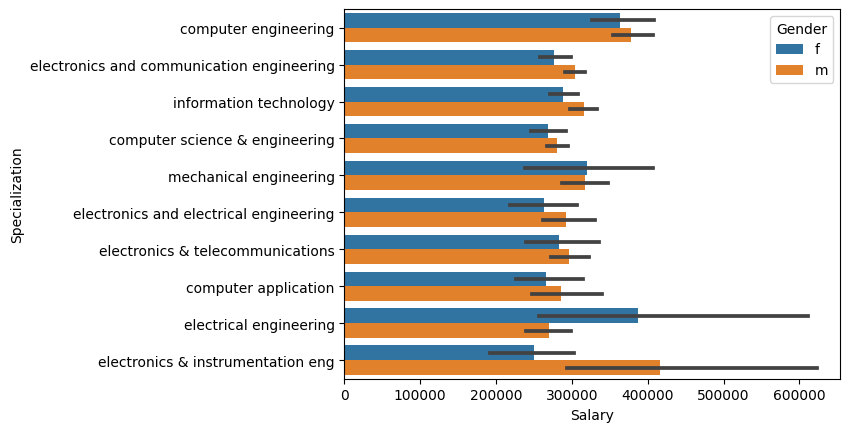

In [38]:
top10=df['Specialization'].value_counts()
top10_spec=list(top10.head(10).index)
top10_spec=df['Specialization'].isin(['electronics and communication engineering',
                                     'computer science & engineering',
                                     'information technology',
                                     'computer engineering',
                                     'computer application',
                                     'mechanical engineering',
                                     'electronics and electrical engineering',
                                     'electronics & telecommunications',
                                     'electrical engineering',
                                     'electronics & instrumentation eng'])

sns.barplot(x=df.Salary,y=df[top10_spec].Specialization,hue=df.Gender)
plt.show()

**Observation -->** Based on the output, the Chi-Square Test Statistic is 104.46891913608455 and the p-value is 1.2453868176976918e-06, with 45 degrees of freedom. Since the p-value is less than the significance level of 0.05, we can reject the null hypothesis. Therefore, we can conclude that there is a relationship between gender and specialization.

### Feature transformation

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(num_cols),columns=num_cols.columns)
df_num.head()

,Salary,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0.527947,0.647233,1.939676,0.283282,0.797646,-0.655278,0.127240,0.961148,0.095037,0.267789,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.983466,0.707581,0.550939,1.512658,-0.304966
1,0.904045,0.758921,0.957729,0.283282,-0.174641,-0.655278,1.842720,1.249258,2.180295,0.960524,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.676367,0.246801,1.300083,0.060978,0.993910
2,0.081332,0.718307,-0.569744,0.283282,-0.181988,-0.655278,1.080285,0.500173,-1.172473,-0.127212,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.301041,1.661318,0.169167,-0.693995,0.803821
3,3.724775,0.779227,0.830439,-3.530054,0.386200,1.526071,1.270894,0.961148,0.912785,0.989957,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.081894,0.210589,-0.364495,-0.237001,-0.775129
4,-0.506320,0.007570,0.212176,0.283282,0.295584,-0.655278,0.413154,1.422124,-0.395612,-0.823681,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.819775,-0.452174,-1.127304,0.258734,0.008542


In [42]:
cat_cols.drop('DOL',axis=1,inplace=True)

In [43]:
cat_cols.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

In [48]:
df_cat=pd.get_dummies(cat_cols,drop_first=True)
df_cat.head()

,Designation_.net web developer,Designation_account executive,Designation_account manager,Designation_admin assistant,Designation_administrative coordinator,Designation_administrative support,Designation_aircraft technician,Designation_android developer,Designation_application developer,Designation_application engineer,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
transformed_data = pd.concat([df_num,df_cat],axis=1)
transformed_data.head()

,Salary,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,0.527947,0.647233,1.939676,0.283282,0.797646,-0.655278,0.127240,0.961148,0.095037,0.267789,...,0,0,0,0,0,0,0,0,0,0
1,0.904045,0.758921,0.957729,0.283282,-0.174641,-0.655278,1.842720,1.249258,2.180295,0.960524,...,0,0,0,0,0,0,0,0,0,0
2,0.081332,0.718307,-0.569744,0.283282,-0.181988,-0.655278,1.080285,0.500173,-1.172473,-0.127212,...,0,0,0,0,0,0,0,1,0,0
3,3.724775,0.779227,0.830439,-3.530054,0.386200,1.526071,1.270894,0.961148,0.912785,0.989957,...,0,0,0,0,0,0,0,0,0,0
4,-0.506320,0.007570,0.212176,0.283282,0.295584,-0.655278,0.413154,1.422124,-0.395612,-0.823681,...,0,0,0,0,0,0,0,1,0,0
